# 76. Minimum Window Substring

## Description:

Given two strings s and t of lengths m and n respectively, return the minimum window 
substring
 of s such that every character in t (including duplicates) is included in the window. If there is no such substring, return the empty string "".

The testcases will be generated such that the answer is unique.

## Examples:

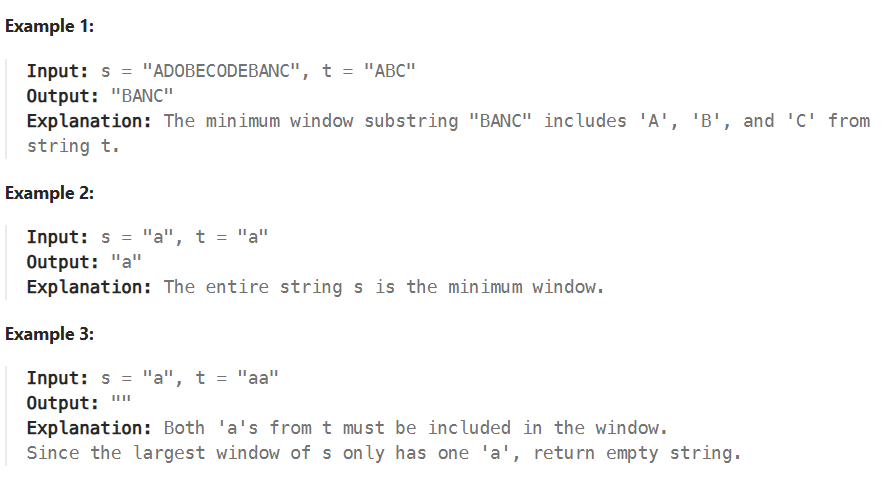

## Constraints:

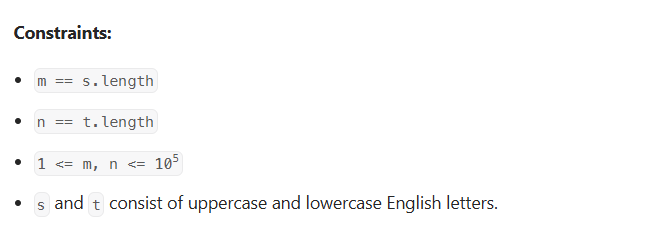

## Solutions:

There are multiple solutions exists here we will discuss some of the solutions one by one.

#### 1. Brute Force